<a href="https://colab.research.google.com/github/Ryansyaaw/Machine-Learning_2023/blob/main/week%209/tugaspraktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [25]:
# gather data
mnist = tf.keras.datasets.mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# normalize value between 0 to 1 instead of 0 to 255
x_train, x_test = x_train / 255.0, x_test/255.0

print("shape of x_train", x_train.shape)
print("shape of x_test", x_test.shape)

shape of x_train (60000, 28, 28)
shape of x_test (10000, 28, 28)


In [26]:
ann = tf.keras.models.Sequential()

In [27]:
model = tf.keras.models.Sequential([
    #array for inputting it to next layer
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0,2),

    tf.keras.layers.Dense(10,activation='softmax')
])

In [28]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5274 - accuracy: 0.6353 - val_loss: 0.8908 - val_accuracy: 0.7901
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7133 - accuracy: 0.8202 - val_loss: 0.5817 - val_accuracy: 0.8549
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5262 - accuracy: 0.8592 - val_loss: 0.4658 - val_accuracy: 0.8804
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4445 - accuracy: 0.8773 - val_loss: 0.4109 - val_accuracy: 0.8912
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3988 - accuracy: 0.8885 - val_loss: 0.3776 - val_accuracy: 0.8985
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3700 - accuracy: 0.8960 - val_loss: 0.3527 - val_accuracy: 0.9043
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3504 - accuracy: 0.9008 - val_loss: 0.3354 - val_accuracy:

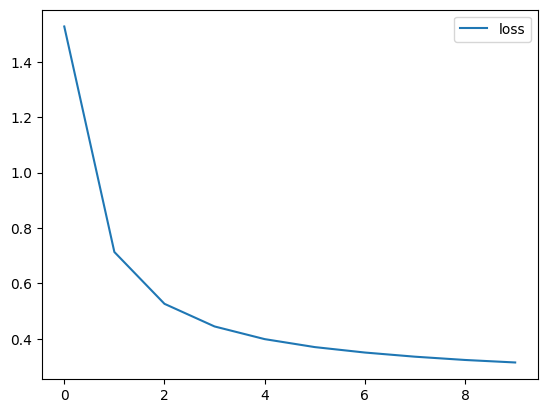

In [31]:
plt.plot(r.history['loss'], label='loss')
plt.legend()

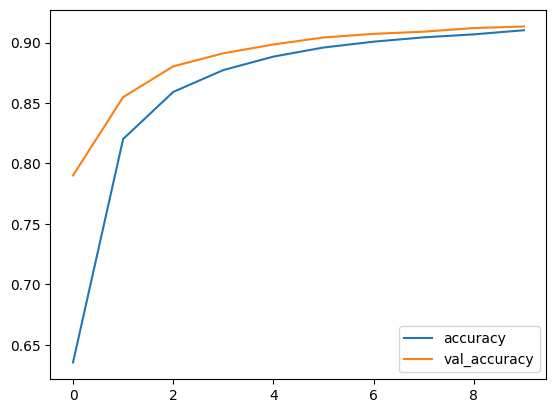

In [32]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [33]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.3029 - accuracy: 0.9134
[0.3029458224773407, 0.9133999943733215]


313/313 [==============================] - 1s 2ms/step
confusion matrix without normalization
[[ 950    0    1    2    0   10    8    4    5    0]
 [   0 1113    4    1    1    3    4    0    9    0]
 [  12    8  903   27   15    2   14   11   39    1]
 [   2    1   17  913    1   29    3   15   21    8]
 [   1    2    5    0  925    0   14    2    4   29]
 [  12    1    7   50    7  742   18    9   37    9]
 [  16    4    9    0   13   14  896    1    5    0]
 [   3   10   24    7    5    0    0  942    3   34]
 [   6   10    9   26   14   28   12   12  842   15]
 [  13    6    3   12   32    3    0   24    8  908]]


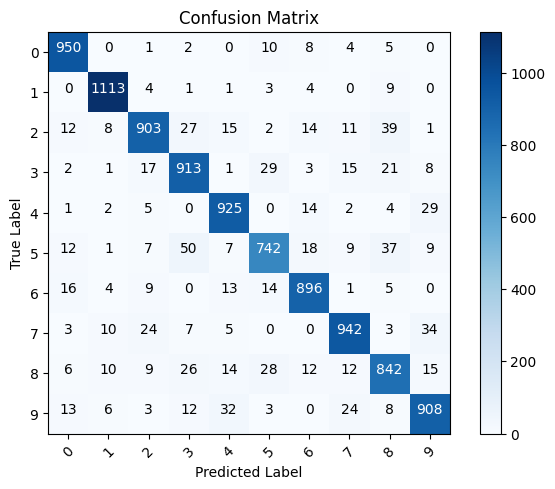

In [34]:


def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title="Confusion Matrix",
                          cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('normalized confusion matrix')
  else:
    print('confusion matrix without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i,j] > thresh else 'black'
             )
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))